In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/stacked_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 251s 18ms/step


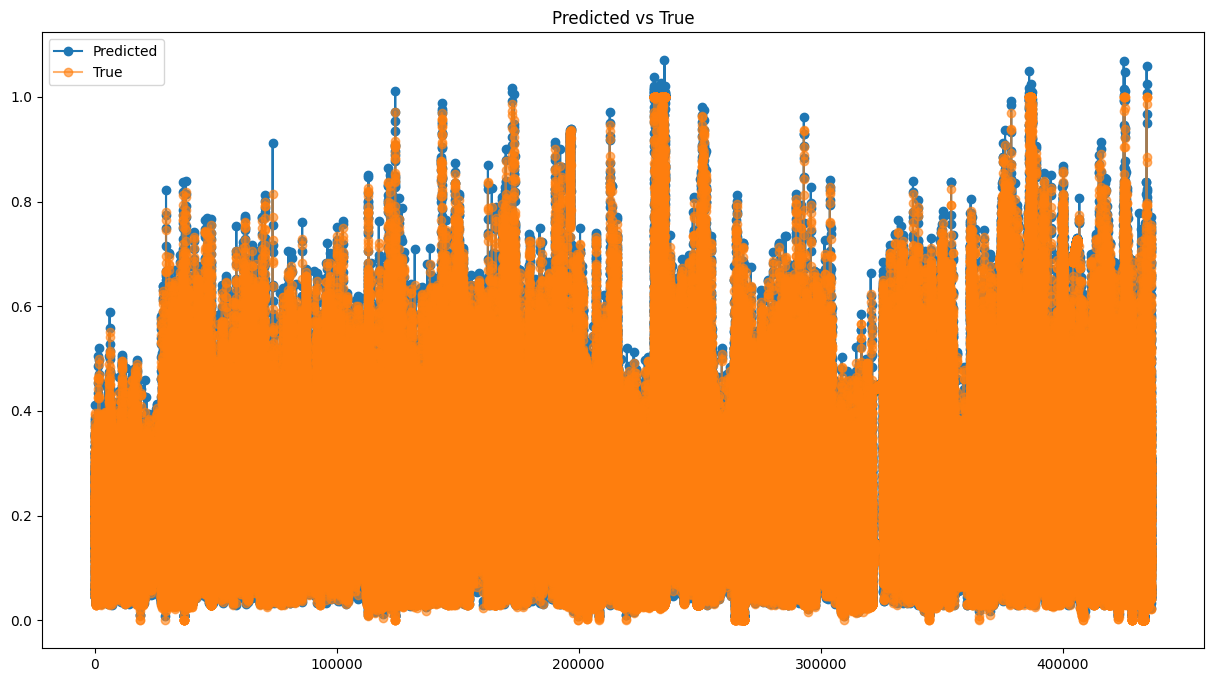

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.010951050714913485,
 'mse': 0.01676355748490644,
 'rmse': 0.00028101685954976267}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          141.799316
1          138.856064
2          139.839600
3          137.486374
4          151.694733
...               ...
436598     122.968605
436599     164.062576
436600     200.795822
436601     203.136047
436602     232.258301

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  141.799316
2023-01-01 00:15:00   140.0  138.856064
2023-01-01 00:30:00   139.0  139.839600
2023-01-01 00:45:00   145.0  137.486374
2023-01-01 01:00:00   159.0  151.694733
...                     ...         ...
2035-06-14 21:30:00   137.0  122.968605
2035-06-14 21:45:00   177.0  164.062576
2035-06-14 22:00:00   198.0  200.795822
2035-06-14 22:15:00   216.0  203.136047
2035-06-14 22:30:00   233.0  232.258301

[436603 rows x 2 columns]

AP, BE, EP: (0.9835983344098286, 0.014445650729955429, 0.0019560148602159404)


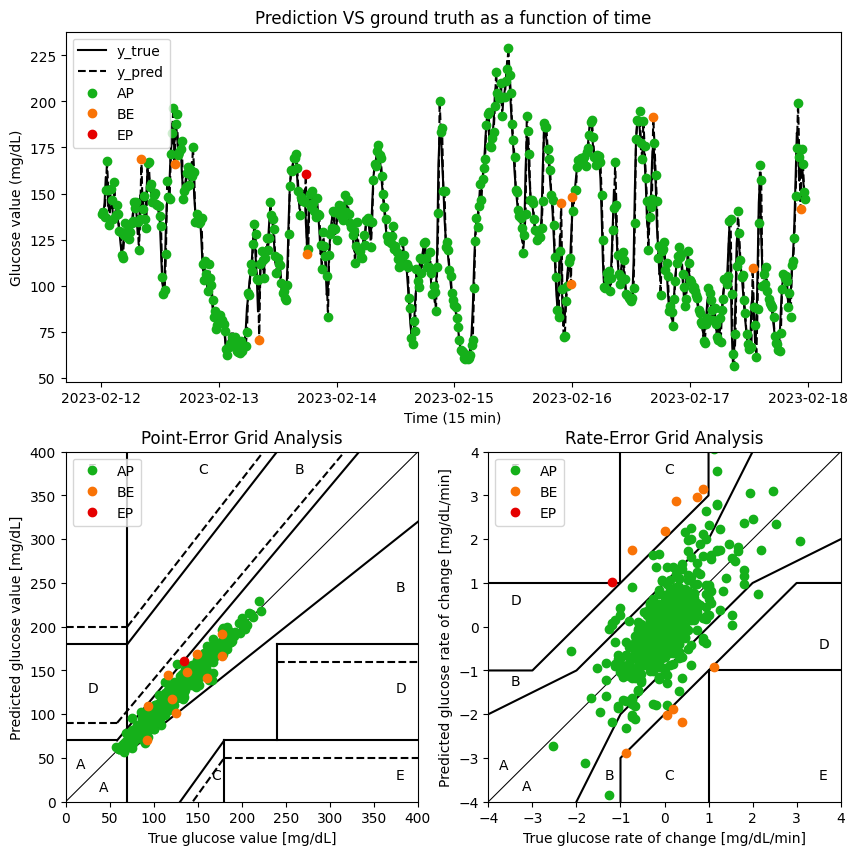

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  141.799316       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  138.856064 -0.066667 -0.196217     AP   
2      2023-02-12 00:30:00   139.0  139.839600 -0.066667  0.065569     AP   
3      2023-02-12 00:45:00   145.0  137.486374  0.400000 -0.156882     AP   
4      2023-02-12 01:00:00   159.0  151.694733  0.933333  0.947224     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  122.968605  2.333333  2.460011     AP   
436599 2035-07-26 21:45:00   177.0  164.062576  2.666667  2.739598     AP   
436600 2035-07-26 22:00:00   198.0  200.795822  1.400000  2.448883     AP   
436601 2035-07-26 22:15:00   216.0  203.136047  1.200000  0.156015     AP   
436602 2035-07-26 22:30:00   233.0  232.258301  1.133333  1.941484     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     B  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 86ms/step


Glucose level Predict  Glucose level True
0               0.221303            0.219565
1               0.214904            0.217391

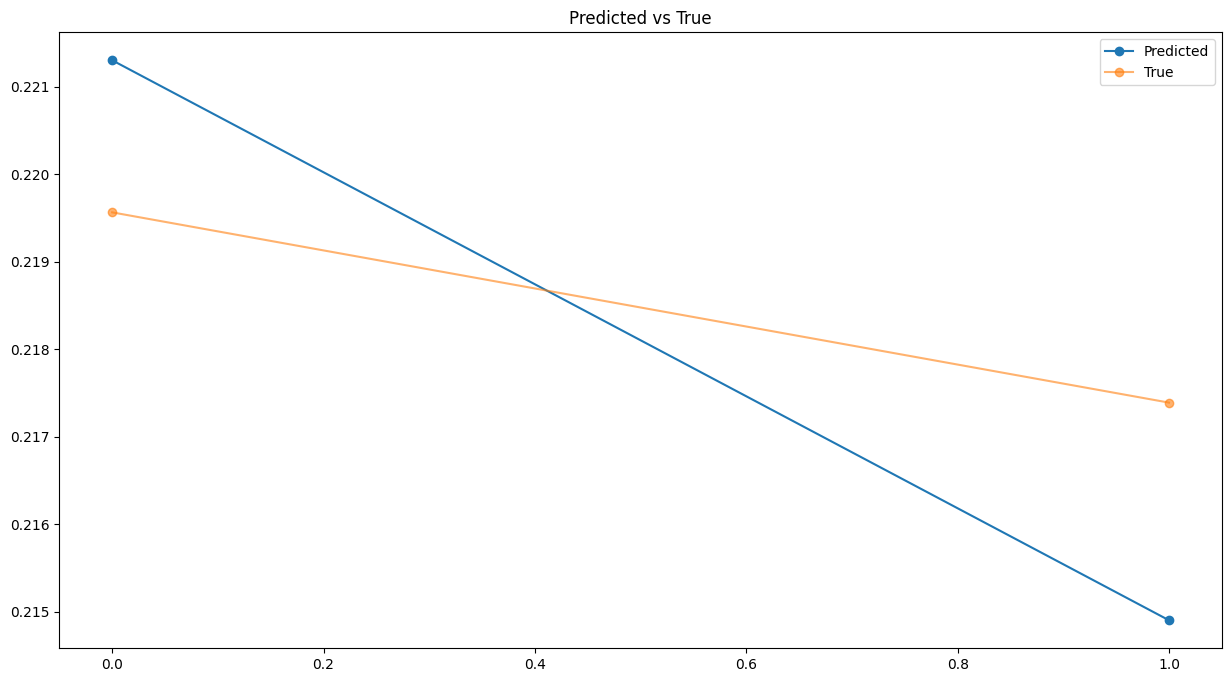

{'mae': 0.0021122184784516107,
 'mse': 0.0021451811760596325,
 'rmse': 4.601802278120588e-06}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             141.799301               141.0
1             138.856049               140.0

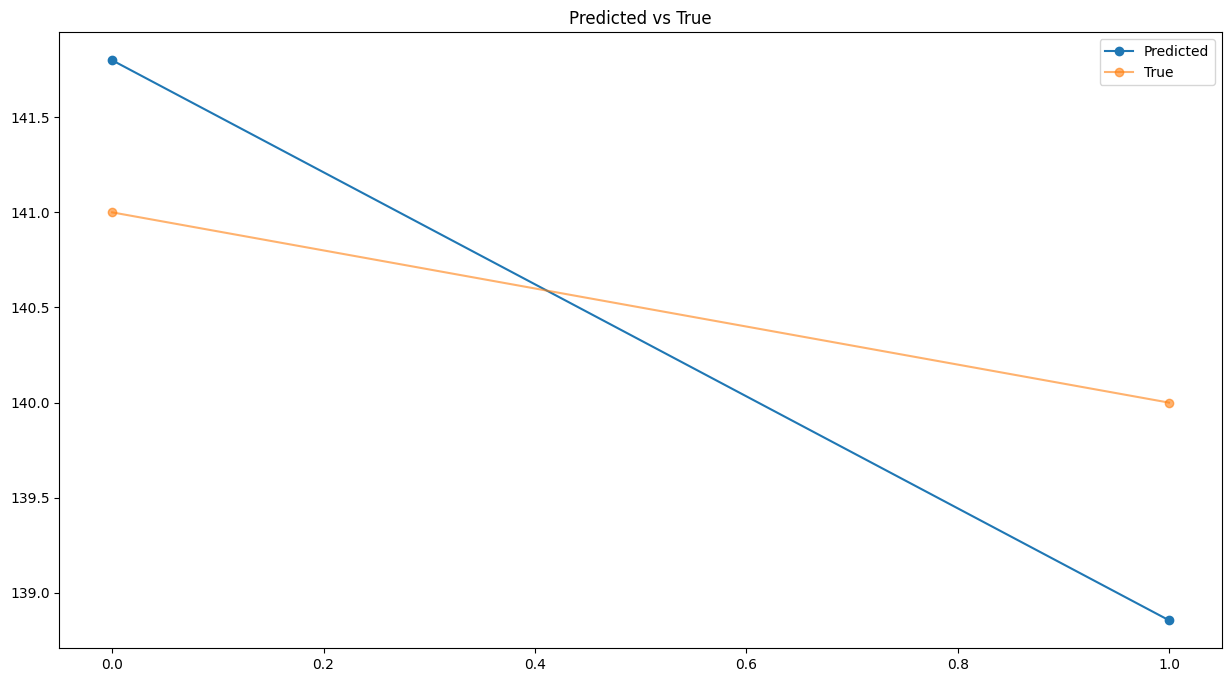

{'mae': 0.9716262817382812,
 'mse': 0.9867895334205072,
 'rmse': 0.9737535832682624}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 68ms/step


Glucose level Predict  Glucose level True
0               0.221303            0.219565
1               0.218097            0.217391

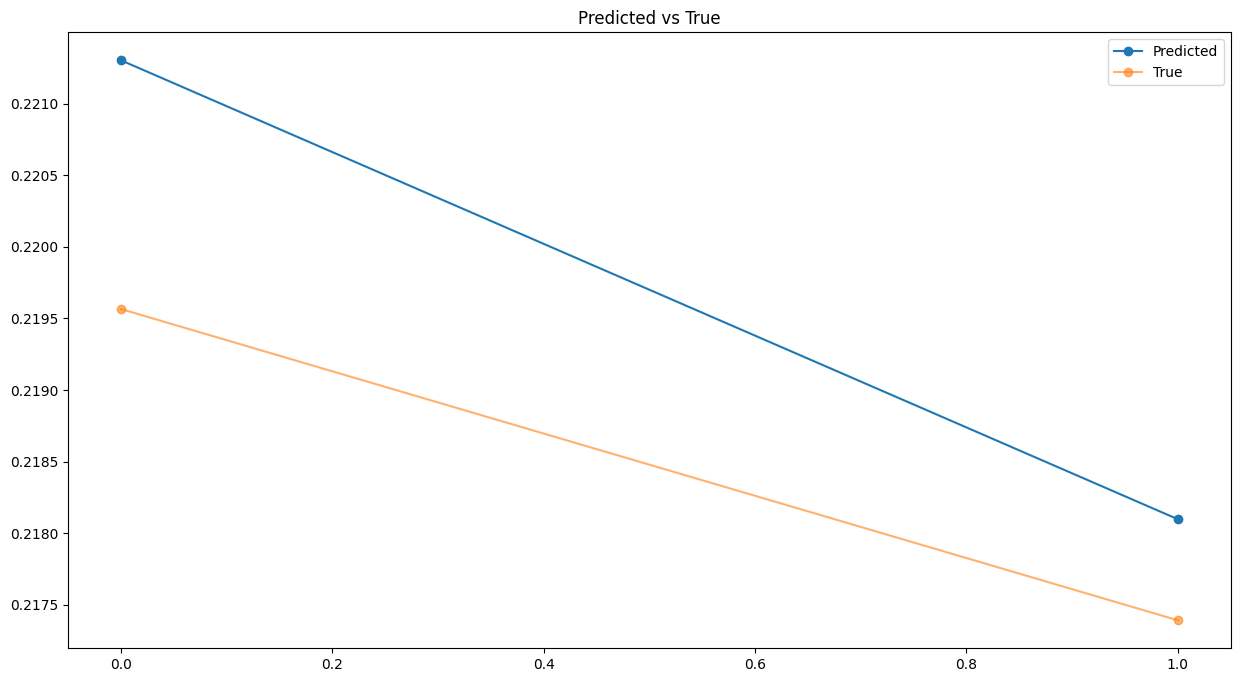

{'mae': 0.0012218520693156876,
 'mse': 0.0013262440954557703,
 'rmse': 1.7589234007312943e-06}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             141.799301               141.0
1             140.324799               140.0

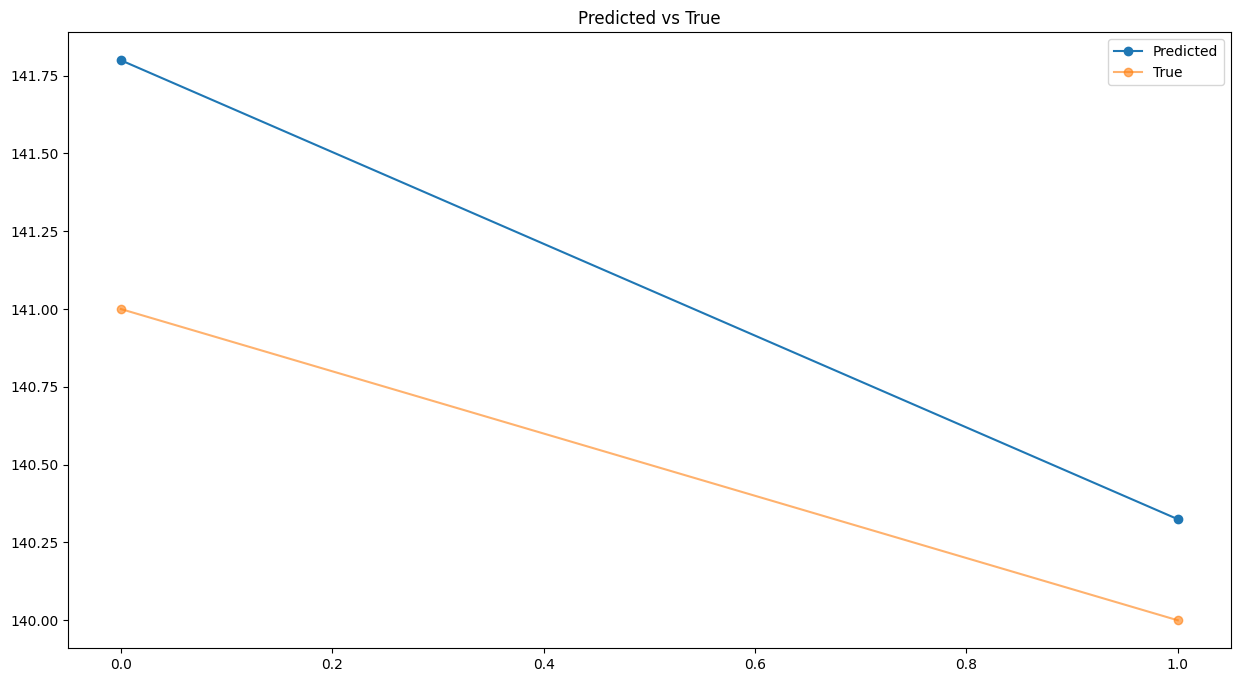

{'mae': 0.5620498657226562,
 'mse': 0.6100723090300962,
 'rmse': 0.3721882222453132}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 18ms/step


Glucose level Predict  Glucose level True
0               0.224262            0.182609
1               0.139102            0.154348
2               0.157315            0.152174
3               0.150007            0.150000
4               0.148133            0.123913

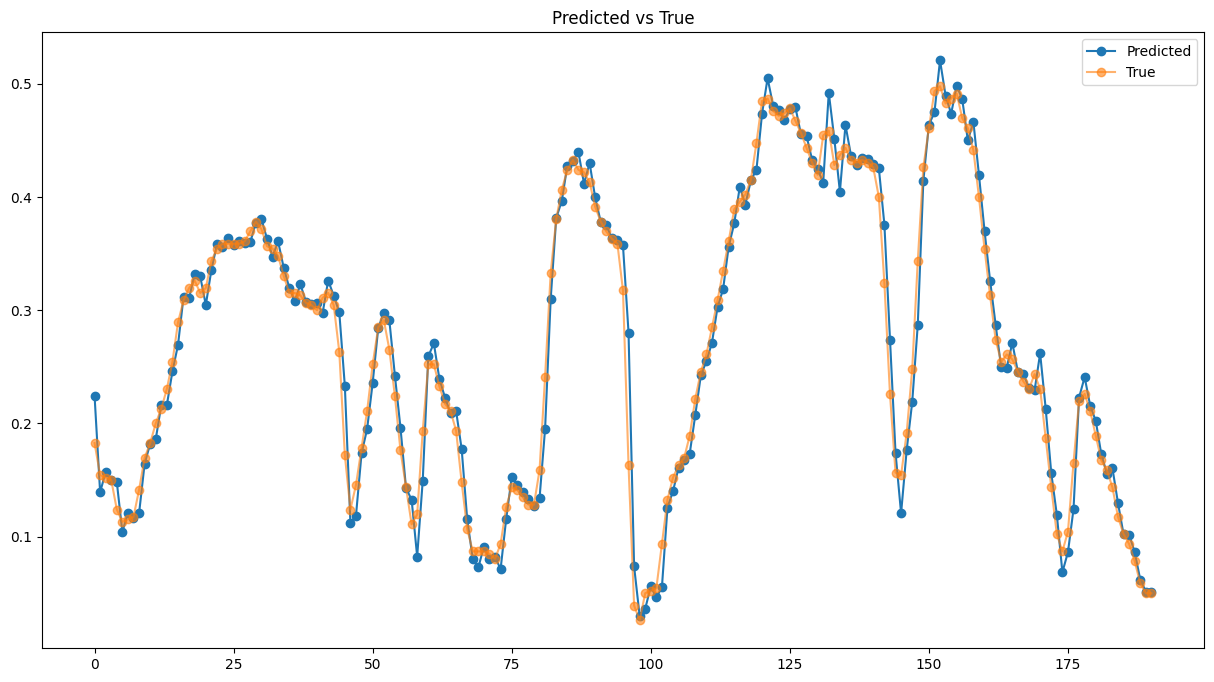

{'mae': 0.013241366485348734,
 'mse': 0.019301898634534617,
 'rmse': 0.00037256329089784934}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

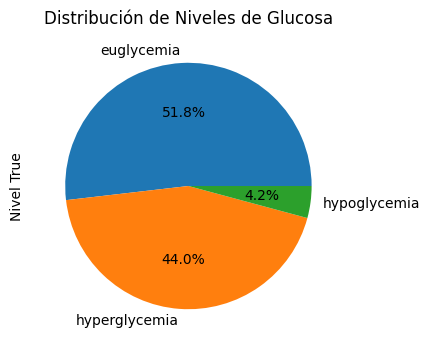

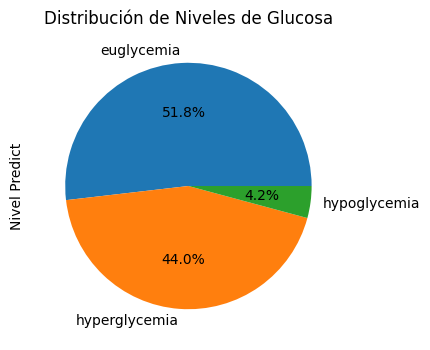

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             143.160599    euglycemia
1               111.0  euglycemia             103.986961    euglycemia
2               110.0  euglycemia             112.364990    euglycemia
3               109.0  euglycemia             109.002991    euglycemia
4                97.0  euglycemia             108.141159    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


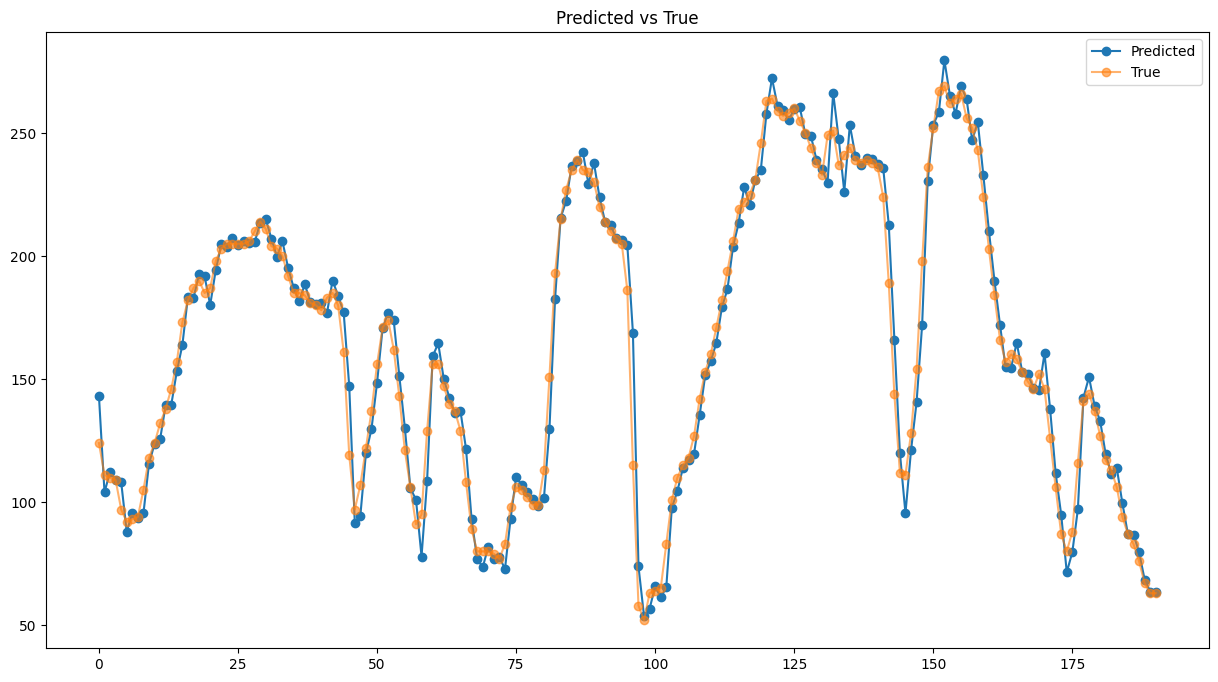

{'mae': 6.091028103653672, 'mse': 8.878872768074173, 'rmse': 78.83438163164912}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  143.160599
2023-01-01 00:15:00   111.0  103.986961
2023-01-01 00:30:00   110.0  112.364990
2023-01-01 00:45:00   109.0  109.002991
2023-01-01 01:00:00    97.0  108.141159
...                     ...         ...
2023-01-02 22:30:00    83.0   86.798264
2023-01-02 22:45:00    76.0   79.701881
2023-01-02 23:00:00    67.0   68.563263
2023-01-02 23:15:00    63.0   63.677856
2023-01-02 23:30:00    63.0   63.602905

[191 rows x 2 columns]

AP, BE, EP: (0.9947368421052631, 0.005263157894736842, 0.0)


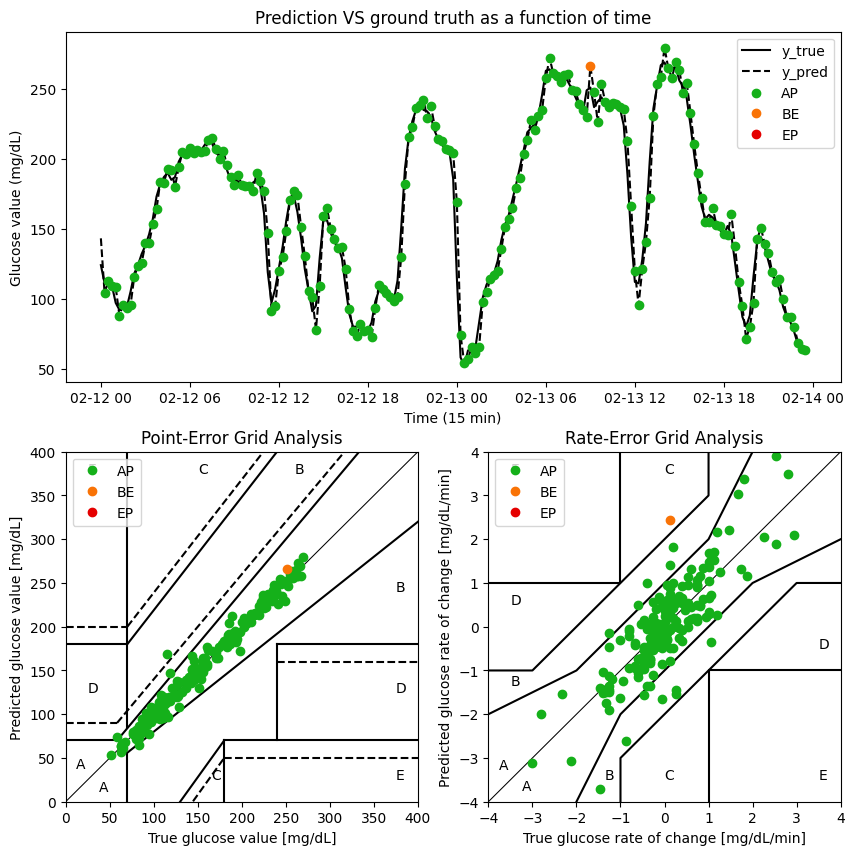

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 1s 9ms/step


Glucose level Predict  Glucose level True
0               0.373576            0.373913
1               0.387429            0.400000
2               0.423151            0.404348
3               0.398548            0.406522
4               0.416304            0.397826

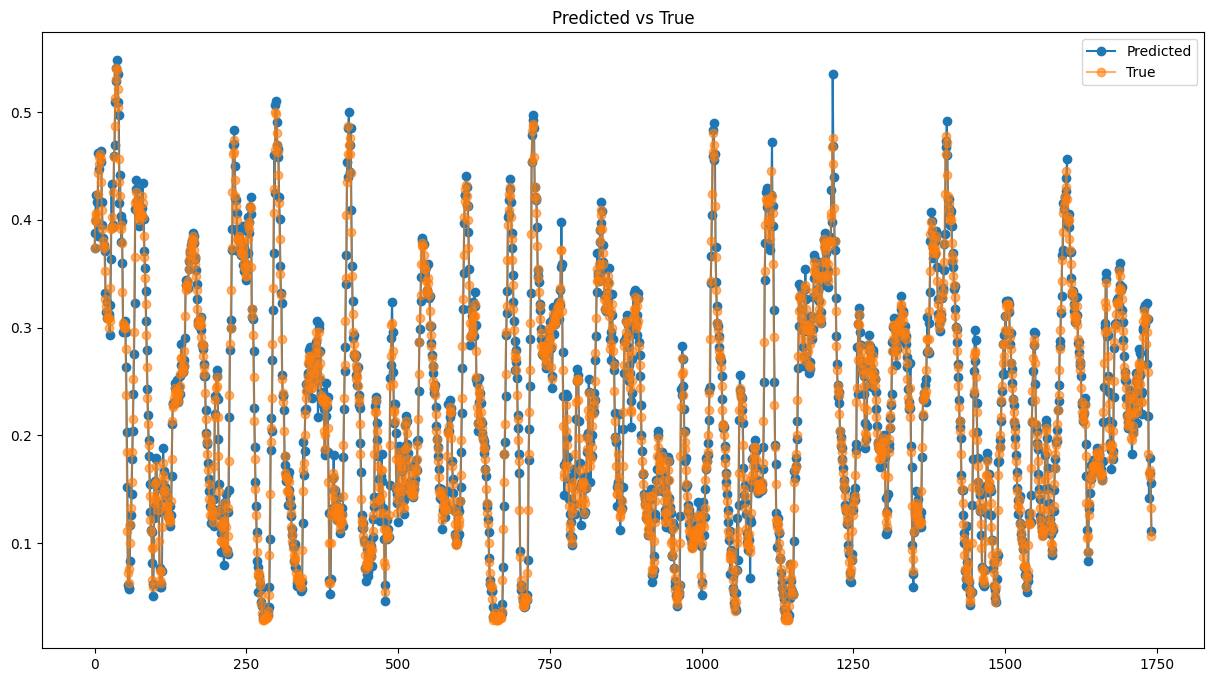

{'mae': 0.0089473370661327,
 'mse': 0.01251660217255889,
 'rmse': 0.00015666532994610592}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

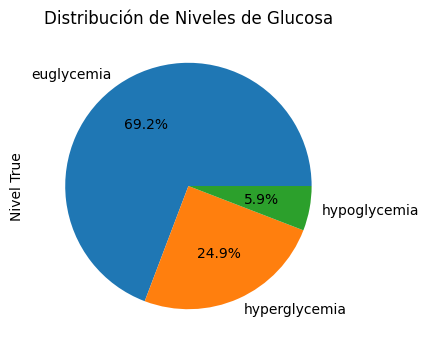

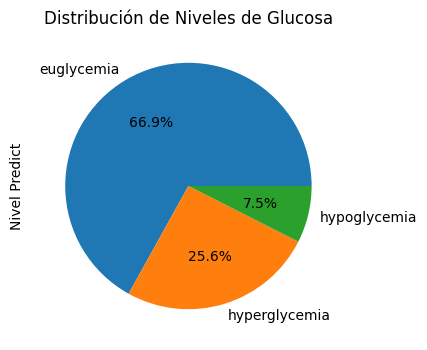

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             211.844864  hyperglycemia
1               224.0  hyperglycemia             218.217377  hyperglycemia
2               226.0  hyperglycemia             234.649261  hyperglycemia
3               227.0  hyperglycemia             223.332275  hyperglycemia
4               223.0  hyperglycemia             231.499802  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


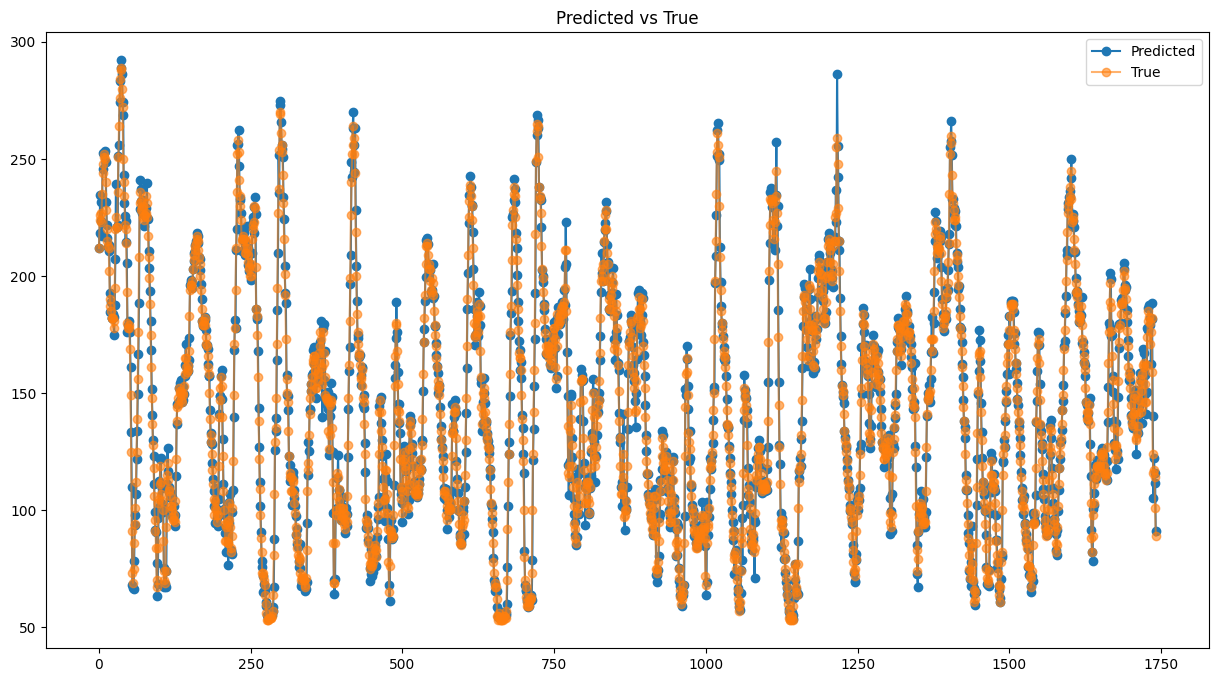

{'mae': 4.1157749032956, 'mse': 5.757636978785774, 'rmse': 33.15038357948137}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  211.844864
2023-01-01 00:15:00   224.0  218.217377
2023-01-01 00:30:00   226.0  234.649261
2023-01-01 00:45:00   227.0  223.332275
2023-01-01 01:00:00   223.0  231.499802
...                     ...         ...
2023-01-19 02:15:00   116.0  105.384956
2023-01-19 02:30:00   117.0  122.268356
2023-01-19 02:45:00   114.0  116.012428
2023-01-19 03:00:00   101.0  111.441788
2023-01-19 03:15:00    89.0   91.226021

[1742 rows x 2 columns]

AP, BE, EP: (0.9936817920735209, 0.005743825387708214, 0.0005743825387708214)


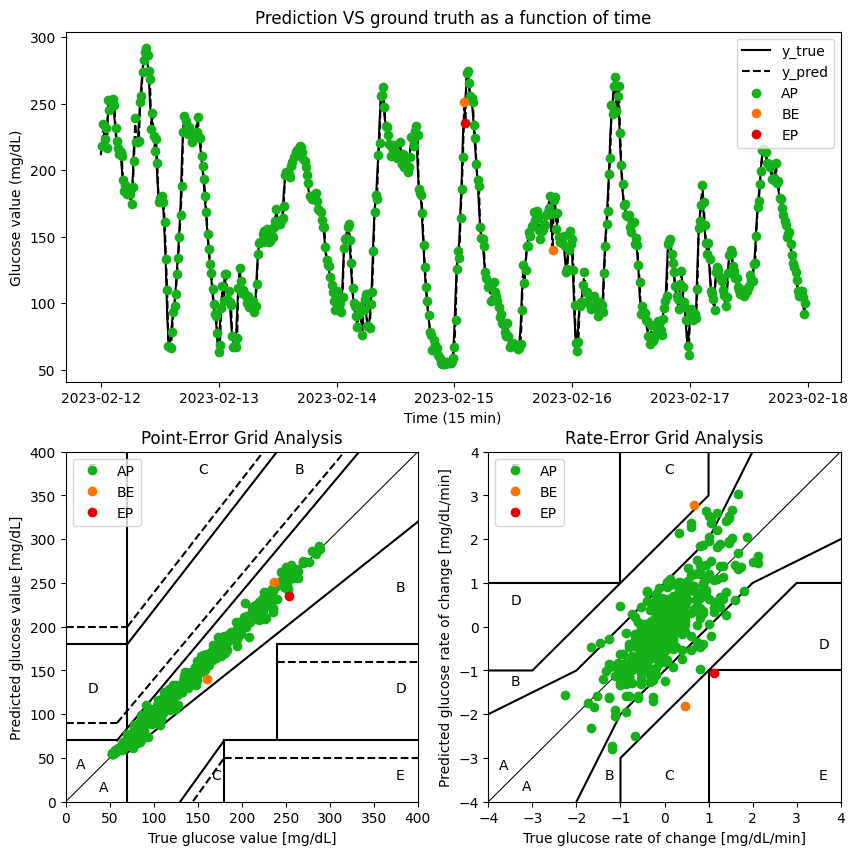

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 2s 18ms/step


Glucose level Predict  Glucose level True
0               0.271198            0.261858
1               0.240622            0.229051
2               0.206918            0.196245
3               0.175049            0.163439
4               0.142312            0.130632

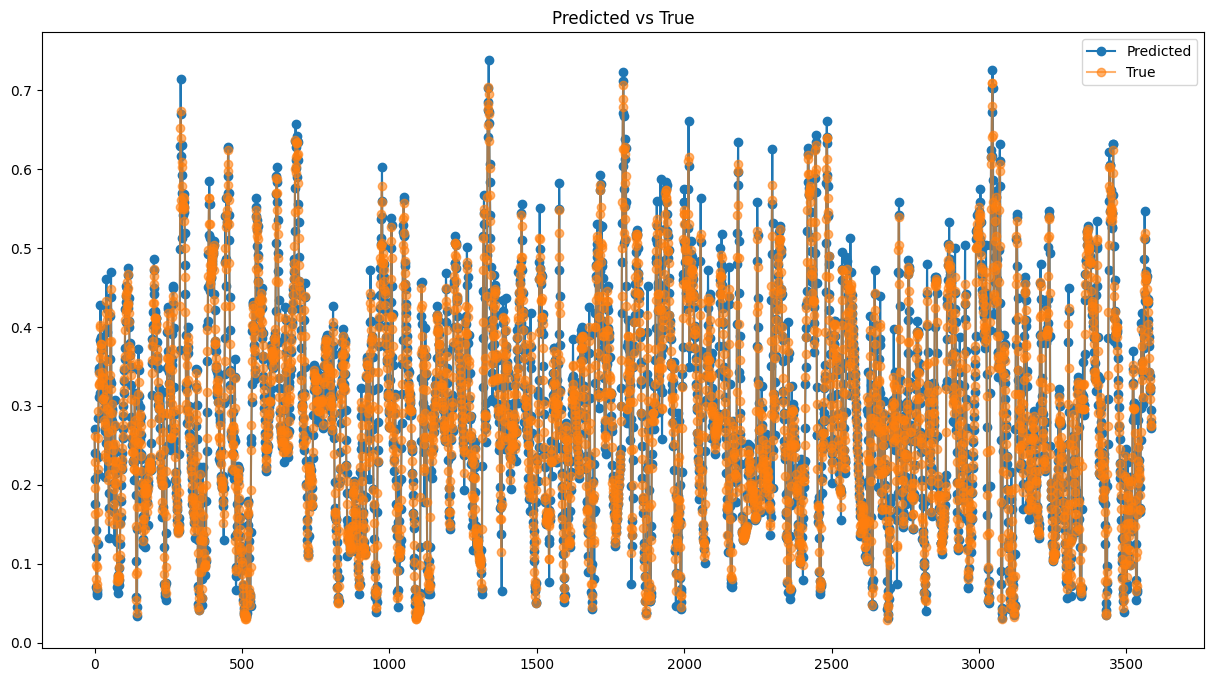

{'mae': 0.014241333253154832,
 'mse': 0.020560986246831916,
 'rmse': 0.00042275415544241123}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

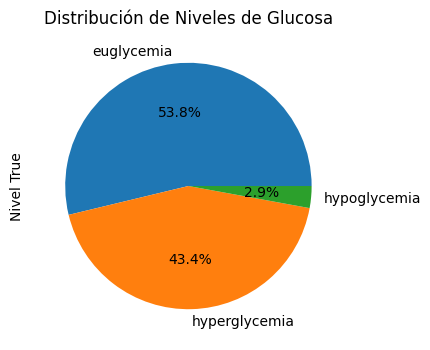

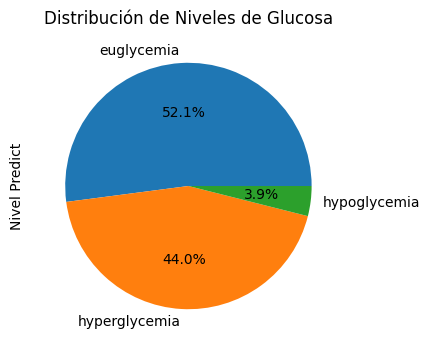

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             164.751144    euglycemia
1          145.363636  euglycemia             150.686172    euglycemia
2          130.272727  euglycemia             135.182480    euglycemia
3          115.181818  euglycemia             120.522369    euglycemia
4          100.090909  euglycemia             105.463676    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


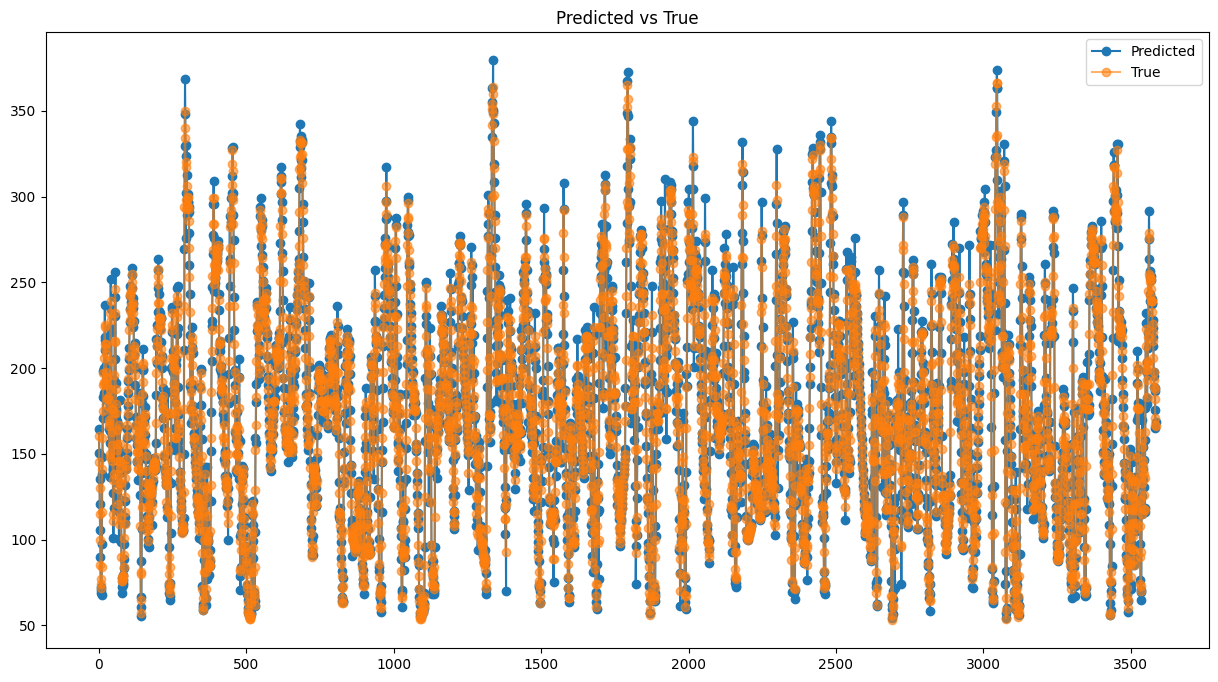

{'mae': 6.551013123654267, 'mse': 9.458053416962349, 'rmse': 89.45477443811316}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  164.751144
2023-01-01 00:15:00  145.363636  150.686172
2023-01-01 00:30:00  130.272727  135.182480
2023-01-01 00:45:00  115.181818  120.522369
2023-01-01 01:00:00  100.090909  105.463676
...                         ...         ...
2023-02-07 07:15:00  188.000000  186.585251
2023-02-07 07:30:00  182.000000  188.137711
2023-02-07 07:45:00  171.000000  175.841080
2023-02-07 08:00:00  167.000000  165.155640
2023-02-07 08:15:00  166.000000  168.507477

[3586 rows x 2 columns]

AP, BE, EP: (0.9729428172942818, 0.02398884239888424, 0.0030683403068340305)


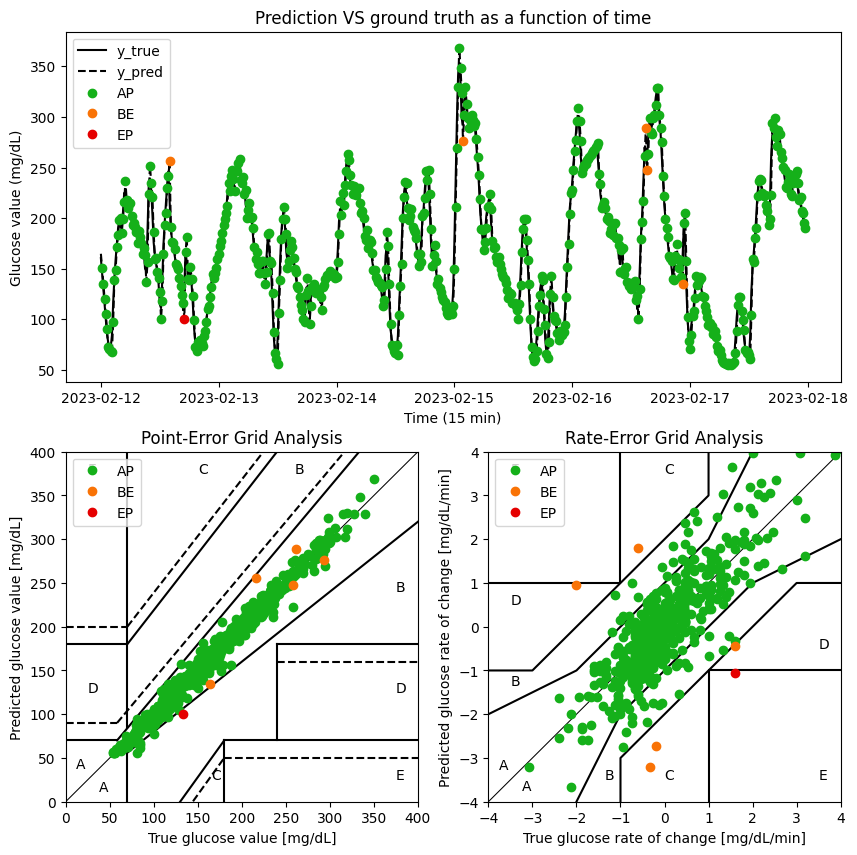

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 3s 18ms/step


Glucose level Predict  Glucose level True
0               0.545003            0.534783
1               0.530623            0.500000
2               0.470184            0.484783
3               0.491283            0.463043
4               0.439632            0.428261

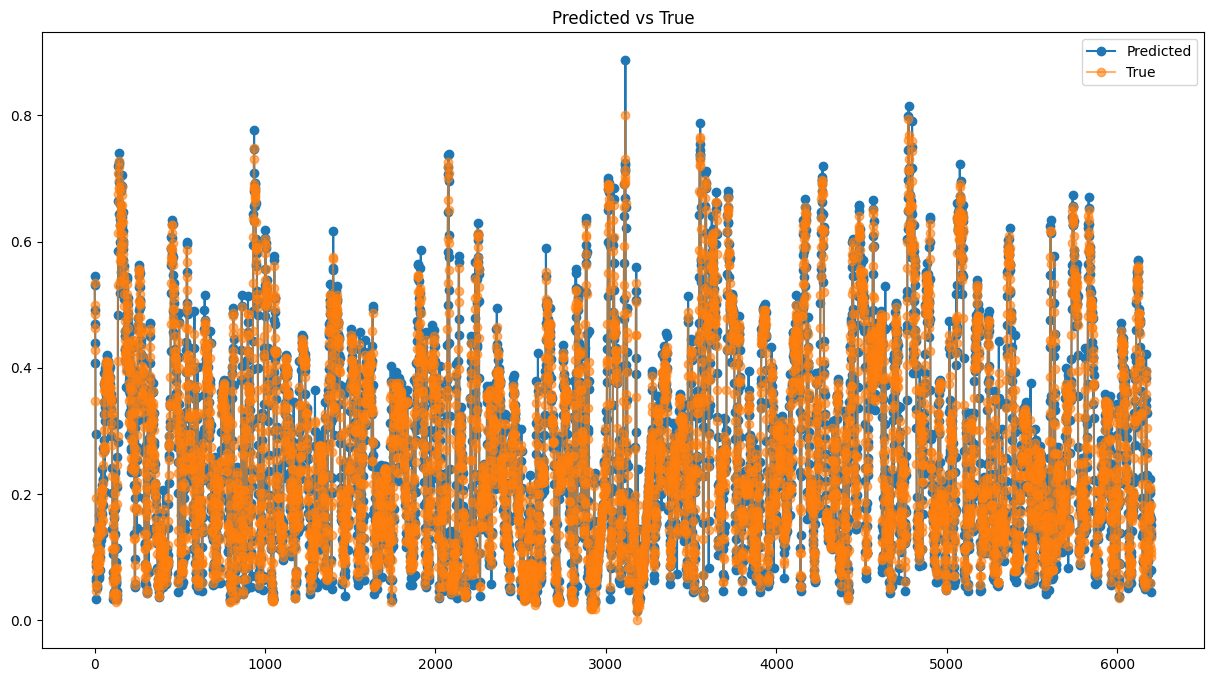

{'mae': 0.016504244819117046,
 'mse': 0.024259615660379385,
 'rmse': 0.0005885289519893248}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

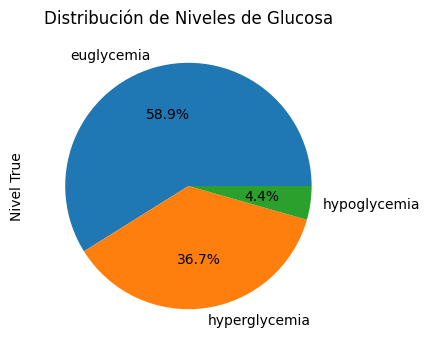

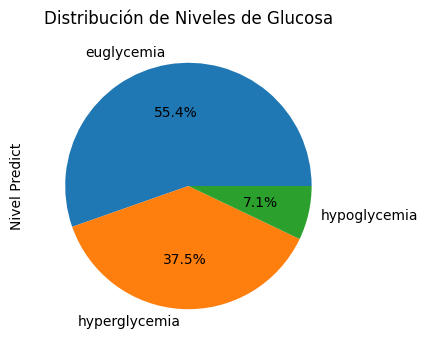

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             290.701538  hyperglycemia
1               270.0  hyperglycemia             284.086548  hyperglycemia
2               263.0  hyperglycemia             256.284485  hyperglycemia
3               253.0  hyperglycemia             265.990356  hyperglycemia
4               237.0  hyperglycemia             242.230759  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


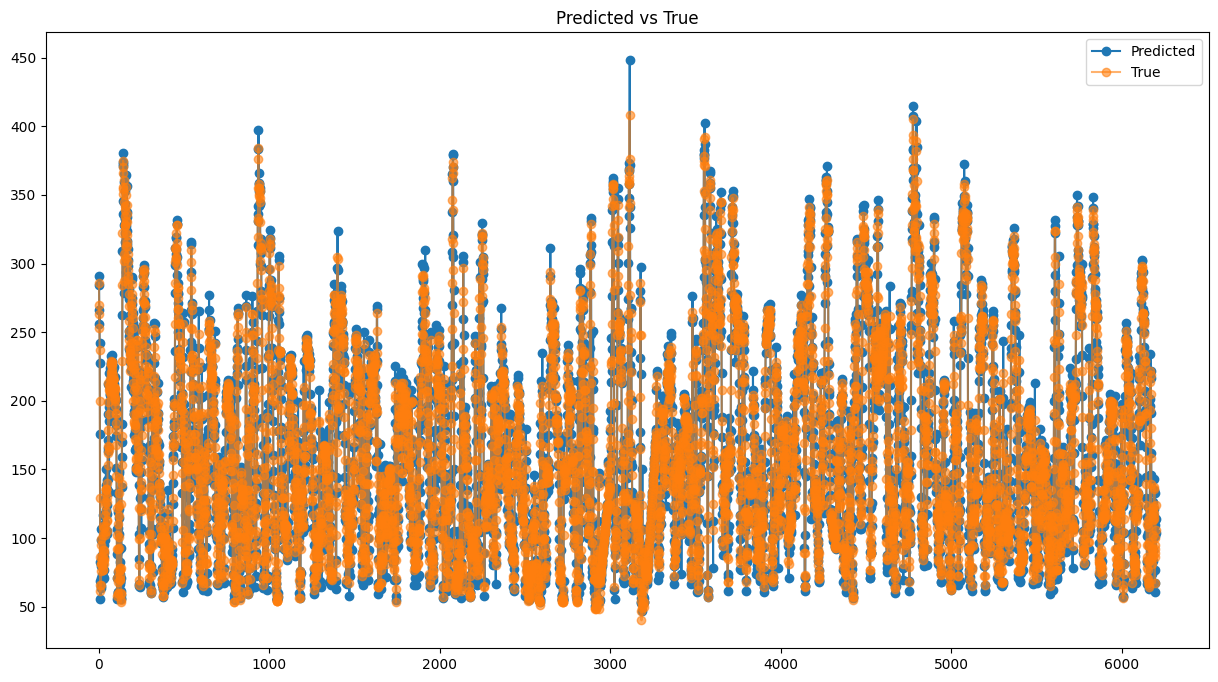

{'mae': 7.591952482671377,
 'mse': 11.159423111464067,
 'rmse': 124.53272418067834}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  290.701538
2023-01-01 00:15:00   270.0  284.086548
2023-01-01 00:30:00   263.0  256.284485
2023-01-01 00:45:00   253.0  265.990356
2023-01-01 01:00:00   237.0  242.230759
...                     ...         ...
2023-03-06 13:00:00   100.0  109.792770
2023-03-06 13:15:00    89.0  101.209709
2023-03-06 13:30:00    92.0   76.757309
2023-03-06 13:45:00   106.0  103.861725
2023-03-06 14:00:00   124.0  113.997307

[6201 rows x 2 columns]

AP, BE, EP: (0.9616129032258065, 0.0332258064516129, 0.005161290322580645)


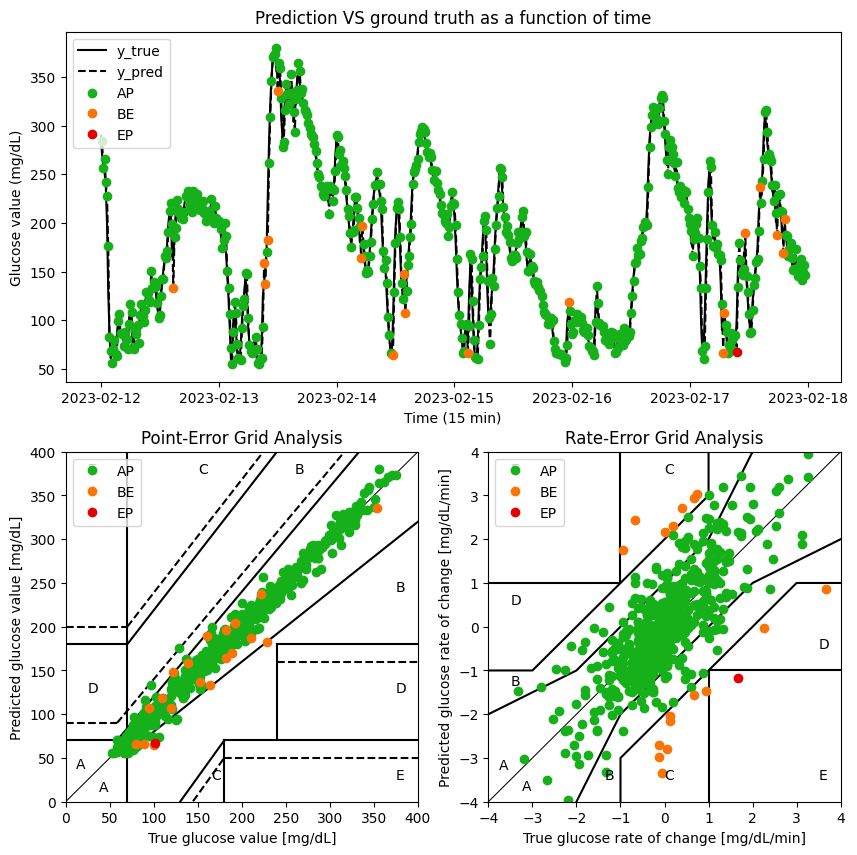

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)